# CSCA 5632 Unsupervised Learning Final Project

## Problem to Solve: Healthy Lifestyle Cities

This project uses K-Clusering and PCA methods to analyze set of data about healthy lifestyle cities from 2021 to determine which cities are the best and the worst in term of City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City). Please note that this project targets audience who care about these factors. The analyzing results from this project do NOT indicate if the cities are good or bad because it uses its own set of factors that affect the analyzing results. 

## Data Source
The data was downloaded from the internet.

## Unsupervised Learning Methods Used
PCA method is used to reduce dimenalities of large datasets. The PCA method helps us reduce dimentionality of large dataset. It also helps us improve performance and understand data more.
K-Clustering method is used to group up cities which have the similar factors.


# Table of Contents:
1. Import depencies or libraries that need to be used in this project
2. Read the data from CVS file and Clean up data or reformat data for the purposes of the project
3. Display plots for the input data
4. Apply PCA and display plots
5. Apply K-Clustering and display plots
6. Conclusions

### 1. Import depencies or libraries that need to be used in this project


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

DEBUG_VERBOSE = False

### 2. Read the data from CVS file and Clean up data or reformat data for the purposes of the project

In [2]:
# Read data from CSV file
data = pd.read_csv('healthy_lifestyle_city_2021.csv')
if DEBUG_VERBOSE:
    print(data.head())

# Clean up data
data = data.replace('-', pd.NA)
data.dropna(inplace=True)

# Convert to right fornat
data['Sunshine hours(City)'] = data['Sunshine hours(City)'].astype(float)
data['Life expectancy(years) (Country)'] = data['Life expectancy(years) (Country)'].astype(float)
data['Pollution(Index score) (City)'] = data['Pollution(Index score) (City)'].astype(float)
data['Annual avg. hours worked'] = data['Annual avg. hours worked'].astype(float)
data['Happiness levels(Country)'] = data['Happiness levels(Country)'].astype(float)
data['Cost of a bottle of water(City)'] = data['Cost of a bottle of water(City)'].replace('[£]', '', regex=True).astype(float)
# Factors that we use for analyzing
factors = data[['Sunshine hours(City)',# index = 0
                'Cost of a bottle of water(City)',# index = 1
                'Life expectancy(years) (Country)',# index = 2
                'Annual avg. hours worked',# index = 3
                'Pollution(Index score) (City)',# index = 4
                'Number of take out places(City)',# index = 5
                'Outdoor activities(City)',# index = 6
                'Happiness levels(Country)']]# index = 7
# Remove symbols in data
for factor in factors:
    if data[factor].dtype == object:
        data[factor] = data[factor].str.replace('£', '').astype(float)

### 3. Display plots for the input data

A. Distribution Plots

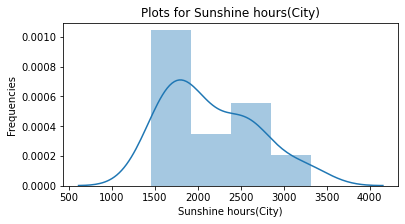

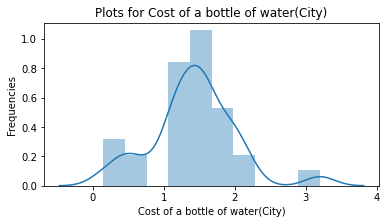

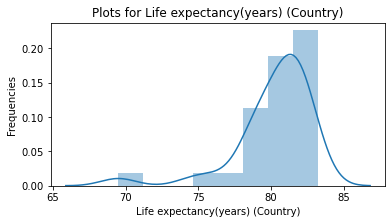

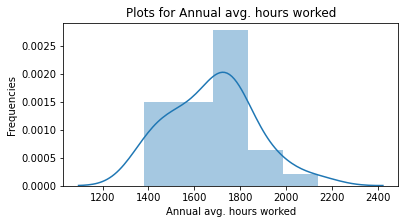

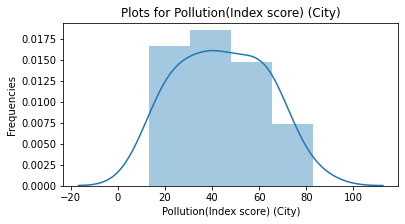

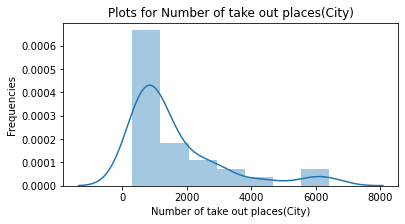

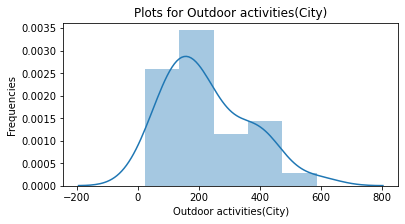

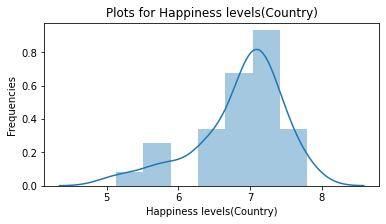

In [3]:
for factor in factors:
    plt.figure(figsize=(6, 3))
    sns.distplot(data[factor].dropna(), kde=True, hist=True)
    plt.title(f'Plots for {factor}')
    plt.xlabel(factor)
    plt.ylabel('Frequencies')
    plt.show()
    

B. Pair Plots

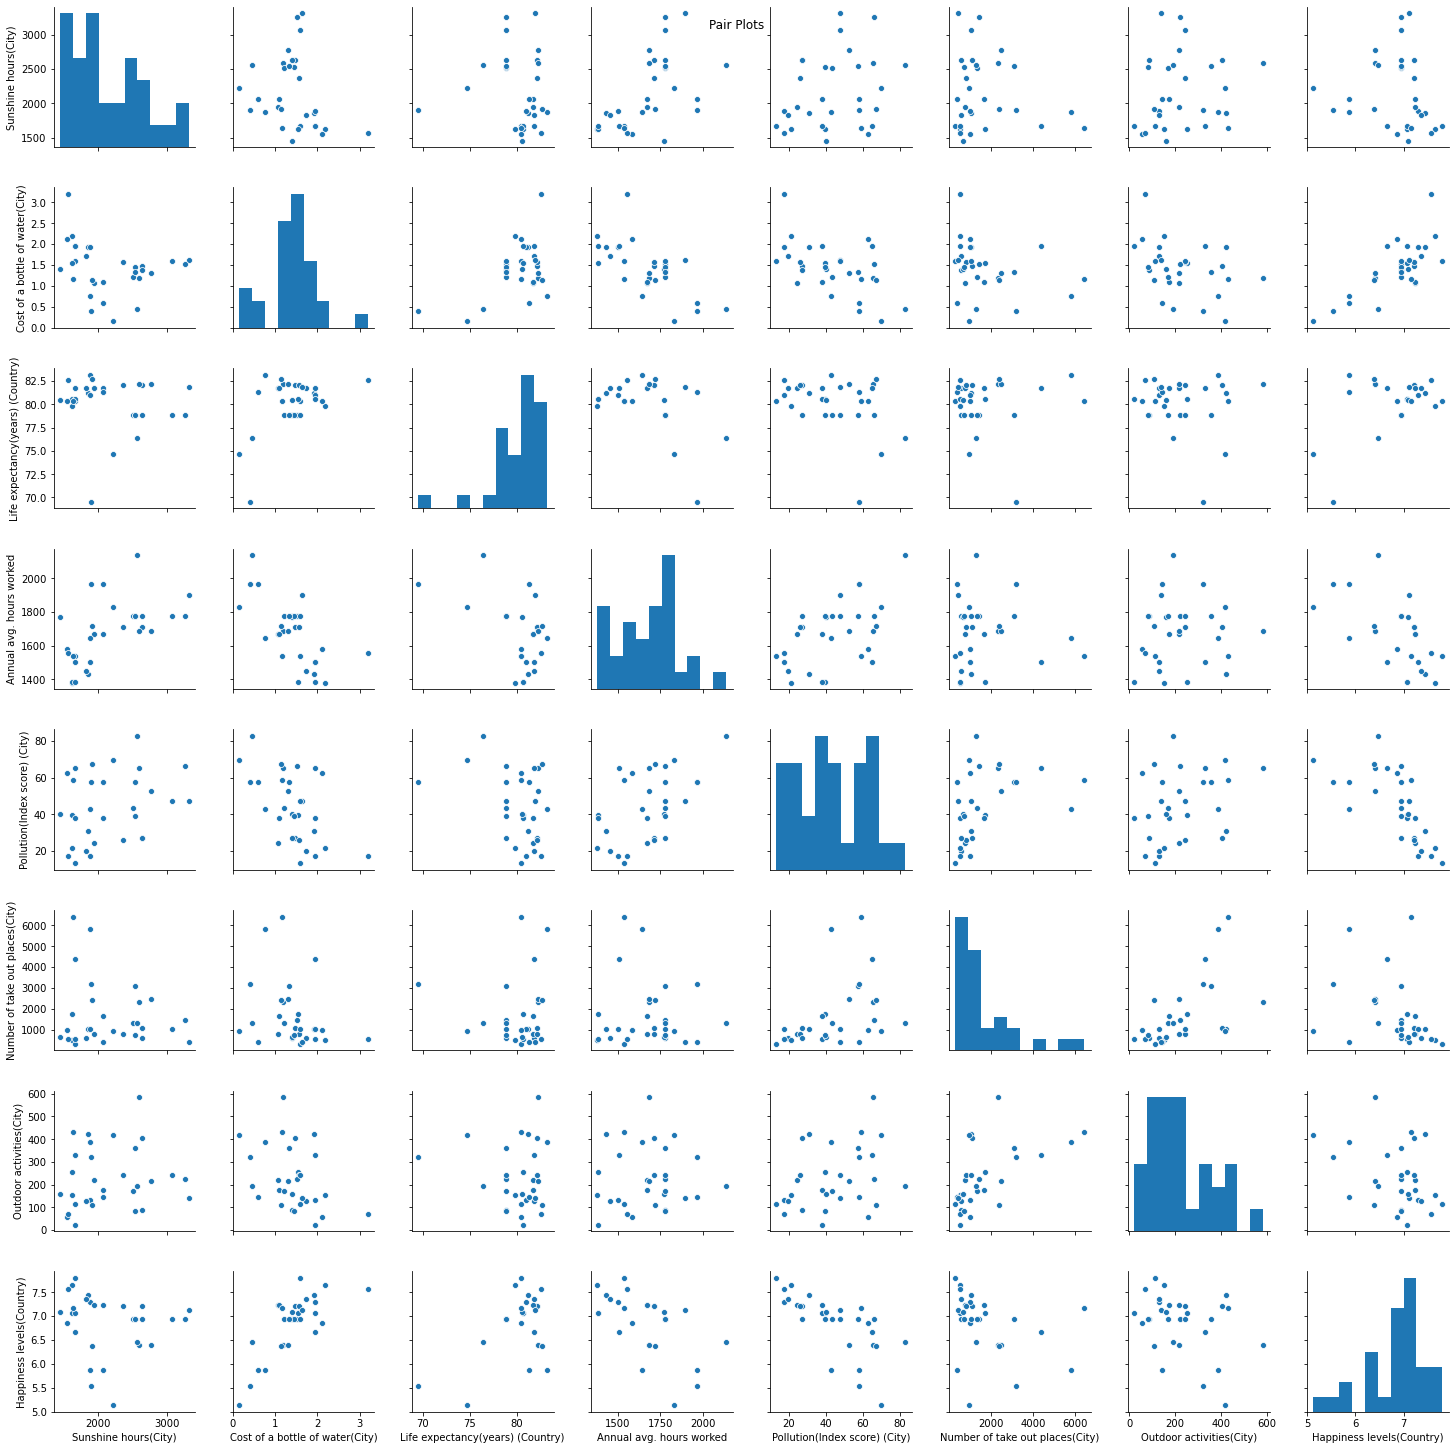

In [4]:
pair_factors = [
    'Sunshine hours(City)', 'Cost of a bottle of water(City)',
    'Life expectancy(years) (Country)', 'Annual avg. hours worked',
    'Pollution(Index score) (City)', 'Number of take out places(City)',
    'Outdoor activities(City)', 'Happiness levels(Country)'
]
sns.pairplot(data[pair_factors])
plt.suptitle('Pair Plots', verticalalignment='bottom')
plt.show()

Discussions: The plots above show relationship and distributions among factors. This is helpful because we can have an idea of the input data before we process and apply unsupervised learning methods on that data. From the plots, we can see there is a variety of data distributions from different cities.

### 4. Apply PCA and display plots

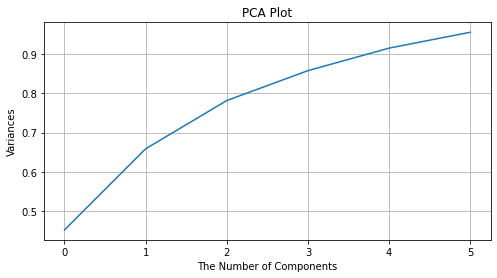

In [5]:
# Scale factors
scaler = StandardScaler()
scaled_factors = scaler.fit_transform(factors)

# Compute PCA to reduce dimensions
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_factors)

# Display PCA plot
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('The Number of Components')
plt.ylabel('Variances')
plt.title('PCA Plot')
plt.grid(True)
plt.show()


Discussions: The PCA plot help us understand the variances more. The first component definitely contributes to the majority of the variance, then it's followed by the second and the third components. We can see the more components it goes after that, the less variance it affects. The result can be used to improve performance with the least data loss. 

### 5.Apply K-Clustering and display plots

### A. Compute K-Cluster Value

In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=50)
clusters = kmeans.fit_predict(pca_features)
data['Cluster'] = clusters

# Print results
print(data[['City', 'Cluster']].sort_values('Cluster'))

                City  Cluster
0          Amsterdam        0
36            Zurich        0
32          Brussels        0
7             Berlin        0
5           Helsinki        0
18         Frankfurt        0
3          Stockholm        0
2             Vienna        0
4         Copenhagen        0
1             Sydney        1
33     San Francisco        1
41          New York        1
20          Tel Aviv        1
24       Los Angeles        1
15            Madrid        1
8          Barcelona        1
28             Tokyo        2
34             Paris        2
37            London        2
17             Seoul        3
14           Toronto        3
26            Boston        3
27            Dublin        3
29           Chicago        3
10         Melbourne        3
9          Vancouver        3
39             Milan        3
40  Washington, D.C.        3
21          Istanbul        4
42            Moscow        4
43       Mexico City        4


### B. Display K-Clustering Plots

#### 2D K-Clustering Plot

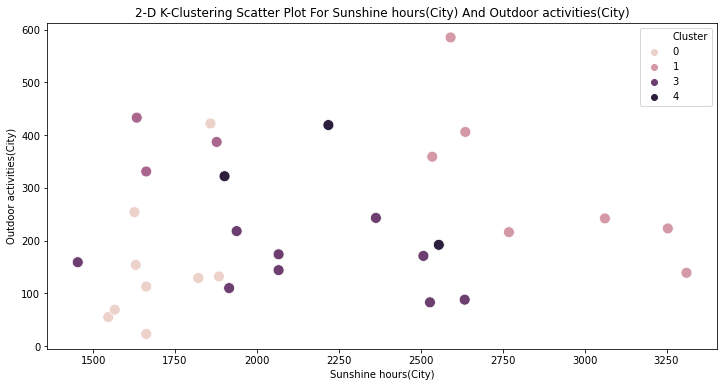

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Sunshine hours(City)', y='Outdoor activities(City)', hue='Cluster', s=120)
plt.title('2-D K-Clustering Scatter Plot For Sunshine hours(City) And Outdoor activities(City)')
plt.show()


Discussions: This 2D K-Means clustering scatter plot shows 'Sunshine hours(City)' and 'Outdoor activities(City)'.
There is a variety of sunshine hours and outdoor activities. The cities are grouped into 5 clusters. Surprisingly, There is no real correlation between sunshine hours and outdoor activities. Also, there is no city that is put into cluster 2. All of them went to the other 4 groups.

#### Scatter Center K-Clustering Plot

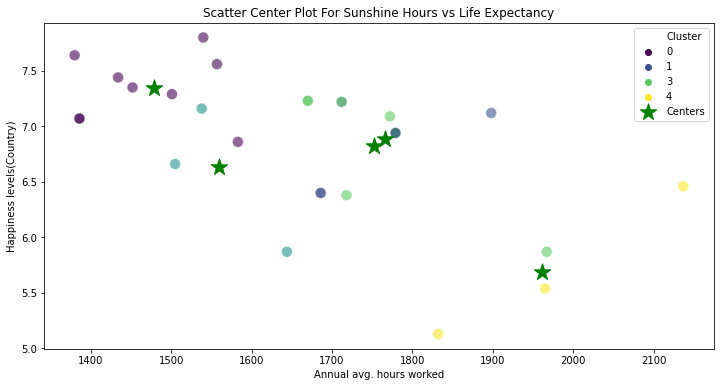

In [8]:
original_scaled_data = scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_))
factors_cols = factors.columns.tolist() 
work_index = factors_cols.index('Annual avg. hours worked')
happiness_index = factors_cols.index('Happiness levels(Country)')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual avg. hours worked', y='Happiness levels(Country)', hue='Cluster', palette='viridis', s=120, alpha=0.6)
# Make sure the indices match what the factor positions in factor list
plt.scatter(original_scaled_data[:, work_index], original_scaled_data[:, happiness_index], s=300, color='green', label='Centers', marker='*')
plt.title('Scatter Center Plot For Sunshine Hours vs Life Expectancy')
plt.legend()
plt.show()

Discussions: The scatter center plot shows 'Annual avg. hours worked' and 'Happiness levels (Country).
Countries with the highes happiness levels seem to have a certain range of annual average hours worked. There are other cities which lie outside and they are outliners. This shows these countries are uniquely differences, but the most most of them are around the green center stars which are the average of all. Most of them are in the 1400-1800 average hours worked annually. 

#### 3D K-Clustering Plot

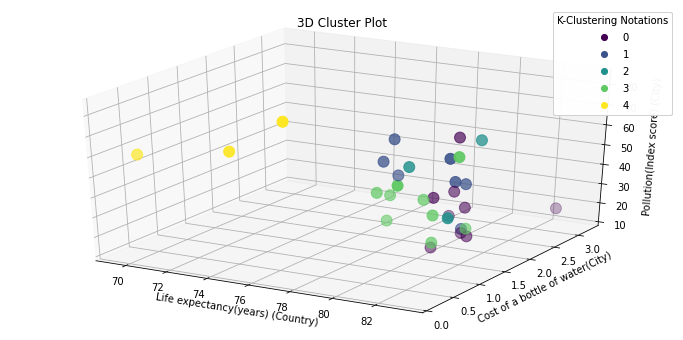

In [9]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['Life expectancy(years) (Country)'],
                     data['Cost of a bottle of water(City)'],
                     data['Pollution(Index score) (City)'],
                     c=data['Cluster'], cmap='viridis', s=120)
ax.set_xlabel('Life expectancy(years) (Country)')
ax.set_ylabel('Cost of a bottle of water(City)')
ax.set_zlabel('Pollution(Index score) (City)')
plt.title('3D Cluster Plot')
legend = ax.legend(*scatter.legend_elements(), title="K-Clustering Notations")
ax.add_artist(legend)
plt.show()

Discussions: This 3D Cluster Plot show the clustering of data points across three dimensions: 'Life Expectancy(years) (Country)', 'Cost of a bottle of water(City)', and 'Pollution(Index score) (City)'.
Life expectancy seems to have great effect in the clustering.
Polution also influences the variance significantly.
Cost of a bottle of water has less variance compared to the other 2.
The 5 groups of clusters:
Cities in Cluster 0 (purple) are places with higher life expectancy, moderate costs of living as indicated by the price of water, and diverse pollution levels.
Cluster 1 (blue) and Cluster 2 (green)represent cities with lower life expectancy, different water costs, and possibly lower pollution scores.
Cluster 3 (orange) contains only a few cities and it has a combination of high life expectancy, low cost of water, and higher pollution.
Cluster 4 (yellow) also has few cities and these cities are diffeent with the rest of the group because they are far away from the groups in the plot.


### 6. Conclusions

In conclusion, after analyzing the input data and output values and diagrams, we can see that unsupervised learning methods help us know more about the variances which affect the cities and how the cities with common similiarities are grouped together. The PCA method helps us reduce dimentionality of large dataset. It also helps us improve performance and understand data more. K-Cluster method helps us group cities so we can do more research on what factors may affect variances and what factors "healthy lifestyle" cities have in common. From the results, we can see that these cities fall within 1400-1800 number of annual average worked hours, 72-80 year of life expectancy, polution levels are below 50. These cites are often grouped together. Also, the cost of water bottles has less effect on the grouping.There are some other unique cities which don't fall in other groups.